# KNMI daggegevens

https://www.knmi.nl/nederland-nu/klimatologie/daggegevens

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Download databestanden van twee verschillende weerstations

In [2]:
filename1 = 'etmgeg_260.txt'    # De Bilt
filename2 = 'etmgeg_279.txt'    # Hoogeveen

In [3]:
names = 'STN,YYYYMMDD,DDVEC,FHVEC,   FG,  FHX, FHXH,  FHN, FHNH,  FXX, FXXH,   TG,   TN,  TNH,   TX,  TXH, T10N,T10NH,   SQ,   SP,    Q,   DR,   RH,  RHX, RHXH,   PG,   PX,  PXH,   PN,  PNH,  VVN, VVNH,  VVX, VVXH,   NG,   UG,   UX,  UXH,   UN,  UNH, EV24'
column_names = names.replace(' ', '').split(',')
column_names

['STN',
 'YYYYMMDD',
 'DDVEC',
 'FHVEC',
 'FG',
 'FHX',
 'FHXH',
 'FHN',
 'FHNH',
 'FXX',
 'FXXH',
 'TG',
 'TN',
 'TNH',
 'TX',
 'TXH',
 'T10N',
 'T10NH',
 'SQ',
 'SP',
 'Q',
 'DR',
 'RH',
 'RHX',
 'RHXH',
 'PG',
 'PX',
 'PXH',
 'PN',
 'PNH',
 'VVN',
 'VVNH',
 'VVX',
 'VVXH',
 'NG',
 'UG',
 'UX',
 'UXH',
 'UN',
 'UNH',
 'EV24']

In [4]:
df1 = pd.read_csv(filename1, skiprows=52, header=None, names=column_names, dtype=str)
df2 = pd.read_csv(filename2, skiprows=52, header=None, names=column_names, dtype=str)

print(df1.shape)
print(df2.shape)

converted = False

(44212, 41)
(12070, 41)


In [5]:
df1.head()

,STN,YYYYMMDD,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,...,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24
0,260,19010101,,,,,,,,,...,,,,,66,,,,,
1,260,19010102,,,,,,,,,...,,,,,86,,,,,
2,260,19010103,,,,,,,,,...,,,,,89,,,,,
3,260,19010104,,,,,,,,,...,,,,,79,,,,,
4,260,19010105,,,,,,,,,...,,,,,65,,,,,


In [6]:
df2.head()

,STN,YYYYMMDD,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,...,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24
0,279,19890101,,,,,,,,,...,,,,,,,,,,
1,279,19890102,,,,,,,,,...,,,,,,,,,,
2,279,19890103,,,,,,,,,...,,,,,,,,,,
3,279,19890104,,,,,,,,,...,,,,,,,,,,
4,279,19890105,,,,,,,,,...,,,,,,,,,,


In [7]:
year = 2021
columns_of_interest = ['STN','YYYYMMDD','TG','TN','TX']

In [8]:
df1_selection = df1.loc[df1['YYYYMMDD'].str.startswith(str(year)), columns_of_interest]
df2_selection = df2.loc[df2['YYYYMMDD'].str.startswith(str(year)), columns_of_interest]

df = df1_selection.append(df2_selection).reset_index(drop=True)

df

,STN,YYYYMMDD,TG,TN,TX
0,260,20210101,30,-35,57
1,260,20210102,36,31,45
2,260,20210103,33,28,40
3,260,20210104,28,23,36
4,260,20210105,29,21,36
...,...,...,...,...,...
725,279,20211227,20,-6,62
726,279,20211228,68,48,89
727,279,20211229,83,64,111
728,279,20211230,119,85,132


In [9]:
df[['GEMIDDELDE','MINIMUM','MAXIMUM']] = df[['TG','TN','TX']].astype('int') / 10

In [10]:
df['DATUM'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d')

In [11]:
stations = {
    260: 'De Bilt',
    279: 'Hoogeveen'
}

df['STATION'] = df['STN'].astype('int').map(stations)

In [12]:
df = df[['DATUM','STATION','GEMIDDELDE','MINIMUM','MAXIMUM']]

In [13]:
df

,DATUM,STATION,GEMIDDELDE,MINIMUM,MAXIMUM
0,2021-01-01,De Bilt,3.0,-3.5,5.7
1,2021-01-02,De Bilt,3.6,3.1,4.5
2,2021-01-03,De Bilt,3.3,2.8,4.0
3,2021-01-04,De Bilt,2.8,2.3,3.6
4,2021-01-05,De Bilt,2.9,2.1,3.6
...,...,...,...,...,...
725,2021-12-27,Hoogeveen,2.0,-0.6,6.2
726,2021-12-28,Hoogeveen,6.8,4.8,8.9
727,2021-12-29,Hoogeveen,8.3,6.4,11.1
728,2021-12-30,Hoogeveen,11.9,8.5,13.2


In [14]:
df_unstacked = df.set_index(['DATUM','STATION']).unstack()
df_unstacked

GEMIDDELDE           MINIMUM           MAXIMUM          
STATION       De Bilt Hoogeveen De Bilt Hoogeveen De Bilt Hoogeveen
DATUM                                                              
2021-01-01        3.0       2.2    -3.5      -1.6     5.7       5.1
2021-01-02        3.6       3.6     3.1       3.0     4.5       4.2
2021-01-03        3.3       3.2     2.8       2.8     4.0       3.9
2021-01-04        2.8       2.5     2.3       1.5     3.6       3.3
2021-01-05        2.9       2.5     2.1       1.6     3.6       3.2
...               ...       ...     ...       ...     ...       ...
2021-12-27        5.6       2.0     2.2      -0.6     9.0       6.2
2021-12-28        8.8       6.8     7.3       4.8    10.7       8.9
2021-12-29        9.5       8.3     8.4       6.4    12.1      11.1
2021-12-30       12.9      11.9    10.0       8.5    13.9      13.2
2021-12-31       12.8      12.7    11.1      11.5    14.4      14.0

[365 rows x 6 columns]

# Visualisatie

In [69]:
variabele = 'GEMIDDELDE'

<AxesSubplot:xlabel='DATUM'>

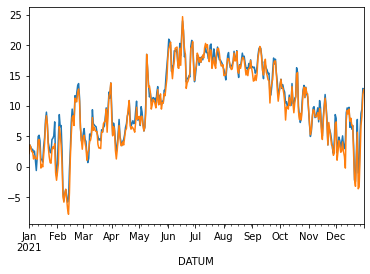

In [70]:
df_unstacked[(variabele, 'De Bilt')].plot()
df_unstacked[(variabele, 'Hoogeveen')].plot()

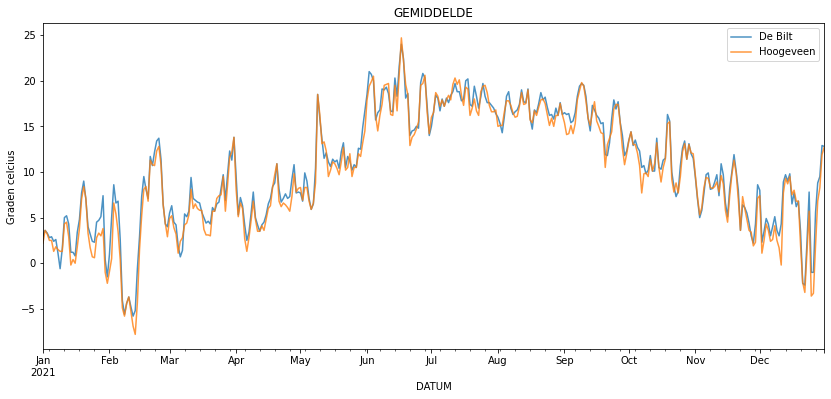

In [71]:
plt.figure(figsize=(14, 6))
df_unstacked[(variabele, 'De Bilt')].plot(alpha=0.8)
df_unstacked[(variabele, 'Hoogeveen')].plot(alpha=0.8)
plt.title(variabele)
plt.ylabel('Graden celcius')
plt.legend(['De Bilt', 'Hoogeveen'])
plt.show()

In [72]:
df_unstacked.describe()

GEMIDDELDE                 MINIMUM                 MAXIMUM  \
STATION     De Bilt   Hoogeveen     De Bilt   Hoogeveen     De Bilt   
count    365.000000  365.000000  365.000000  365.000000  365.000000   
mean      10.481096    9.927397    6.217534    5.927123   14.378356   
std        6.109086    6.371840    5.787920    5.995204    6.935519   
min       -5.800000   -7.800000  -10.900000  -12.900000   -4.800000   
25%        5.700000    5.200000    1.900000    1.500000    9.200000   
50%       10.300000    9.700000    6.300000    5.800000   14.200000   
75%       16.300000   15.700000   11.000000   10.900000   20.300000   
max       24.000000   24.700000   18.800000   18.100000   30.800000   

                     
STATION   Hoogeveen  
count    365.000000  
mean      13.891233  
std        7.299061  
min       -4.400000  
25%        8.500000  
50%       13.700000  
75%       20.400000  
max       32.800000

<AxesSubplot:>

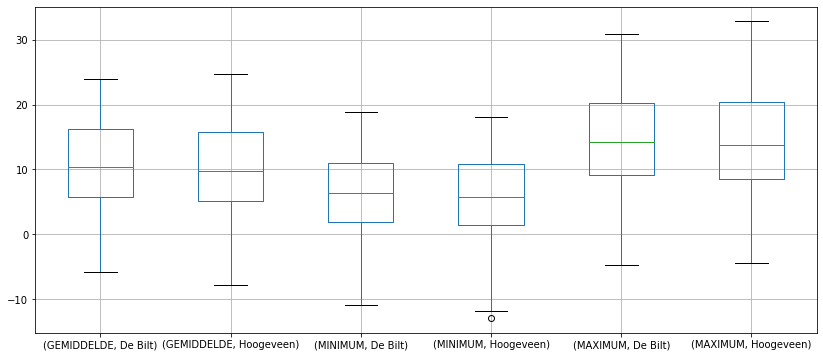

In [73]:
df_unstacked.boxplot(figsize=(14, 6))

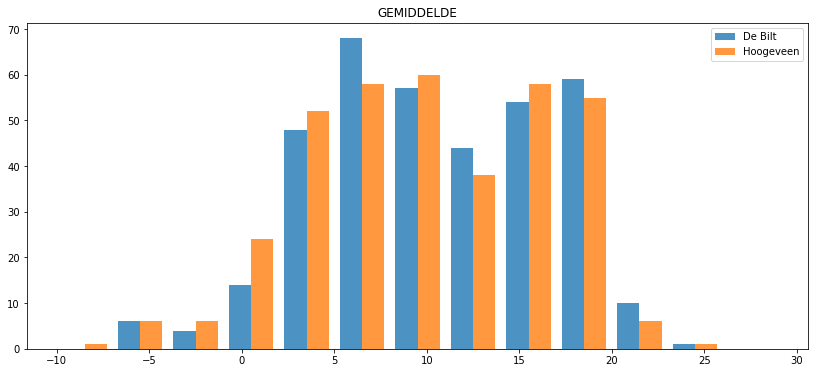

In [74]:
bins = np.arange(-10, 30, 3)
plt.figure(figsize=(14, 6))
plt.hist([df_unstacked[(variabele, 'De Bilt')], 
          df_unstacked[(variabele, 'Hoogeveen')]], 
         bins=bins, 
         alpha=0.8)
plt.title(variabele)
plt.legend(['De Bilt', 'Hoogeveen'])
plt.show()

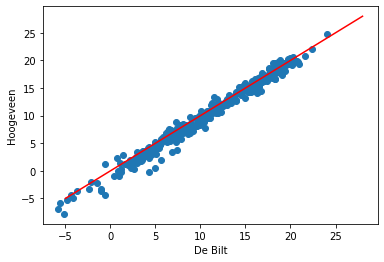

In [109]:
plt.scatter(df_unstacked[(variabele,'De Bilt')], 
            df_unstacked[(variabele,'Hoogeveen')])
plt.plot([-5, 28], [-5, 28], color='r')
plt.xlabel('De Bilt')
plt.ylabel('Hoogeveen')
plt.show()


#### Temperatuurverschil

In [76]:
diff = df_unstacked[(variabele,'Hoogeveen')] - df_unstacked[(variabele,'De Bilt')]
diff

DATUM
2021-01-01   -0.8
2021-01-02    0.0
2021-01-03   -0.1
2021-01-04   -0.3
2021-01-05   -0.4
             ... 
2021-12-27   -3.6
2021-12-28   -2.0
2021-12-29   -1.2
2021-12-30   -1.0
2021-12-31   -0.1
Length: 365, dtype: float64

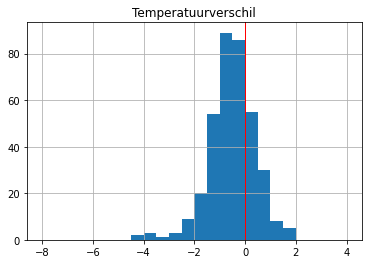

In [110]:
bins = np.arange(-8, 4.5, 0.5)
diff.hist(bins=bins)
plt.axvline(0, color='red', linewidth=1)
plt.title('Temperatuurverschil')
plt.show()

In [113]:
print('Gemiddeld is het %.2f graden kouder in %s dan in %s' % (-diff.mean(),
                                                               stations[260], 
                                                               stations[279]))

Gemiddeld is het 0.55 graden kouder in De Bilt dan in Hoogeveen


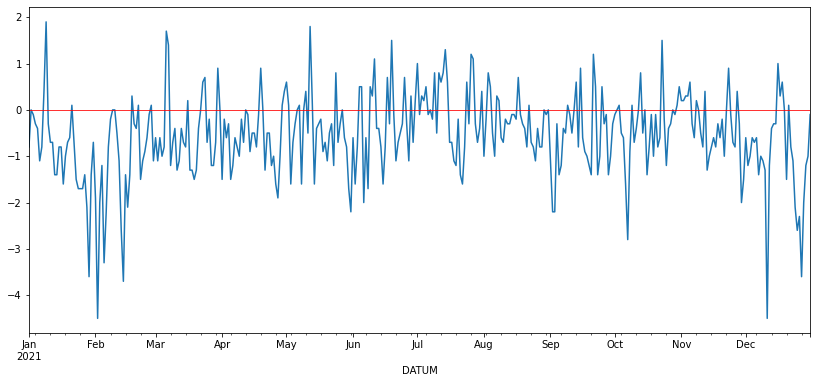

In [79]:
plt.figure(figsize=(14, 6))
diff.plot()
plt.axhline(0, color='red', linewidth=1, alpha=0.8)
plt.show()


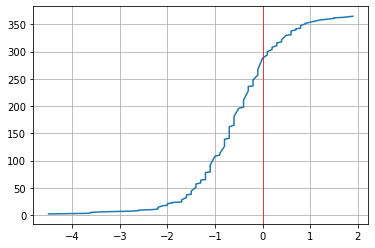

In [80]:
n = diff.groupby(diff).count()

cum_diff = n.cumsum()
cum_diff.plot()
plt.axvline(0, color='red', linewidth=1.0, alpha=0.7)
plt.grid()

In [112]:
n_kouder = np.sum(diff<0)
n_totaal, _ = df_unstacked.shape

print('Op %d van de %d dagen (%.0f%%) is het kouder in %s dan in %s' % (n_kouder, 
                                                                        n_totaal, 
                                                                        100 * n_kouder/n_totaal, 
                                                                        stations[279], 
                                                                        stations[260]))

Op 267 van de 365 dagen (73%) is het kouder in Hoogeveen dan in De Bilt


## Student t-test

In [115]:
from scipy import stats
t, p = stats.ttest_1samp(diff, -0.55)
print("The t-statistic is %.3f and the p-value is %.5f." % (t, p/2))

The t-statistic is -0.079 and the p-value is 0.46870.


## Global Warming in Nederland

In [93]:
data = pd.read_csv(filename1, skiprows=52, header=None, names=column_names, dtype=str)

In [95]:
df = data[['YYYYMMDD','TG']].astype(np.int32)
df[['GEMIDDELDE']] = df[['TG']] / 10
df['DATUM'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d')
df.set_index('DATUM', inplace=True)
df = df.truncate(before='1900-01-01', after='2021-12-31')[['GEMIDDELDE']]
df

,GEMIDDELDE
DATUM,
1901-01-01,-4.9
1901-01-02,-1.8
1901-01-03,-2.6
1901-01-04,-6.5
1901-01-05,-6.0
...,...
2021-12-27,5.6
2021-12-28,8.8
2021-12-29,9.5


In [96]:
weekly = df.resample('W').mean()
monthly = df.resample('M').mean()
yearly = df.resample('Y').mean()

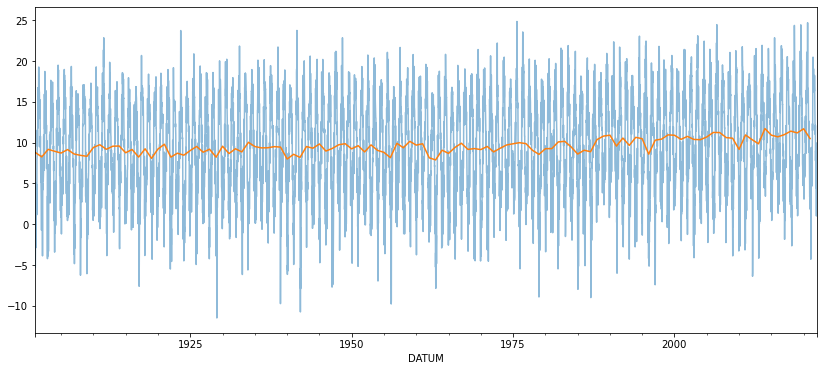

In [97]:
plt.figure(figsize=(14, 6))
weekly['GEMIDDELDE'].plot(alpha=0.5)
yearly['GEMIDDELDE'].plot()
plt.show()

In [105]:
coefs = np.polyfit(yearly.index.year, yearly['GEMIDDELDE'], 5)
model = np.poly1d(coefs)

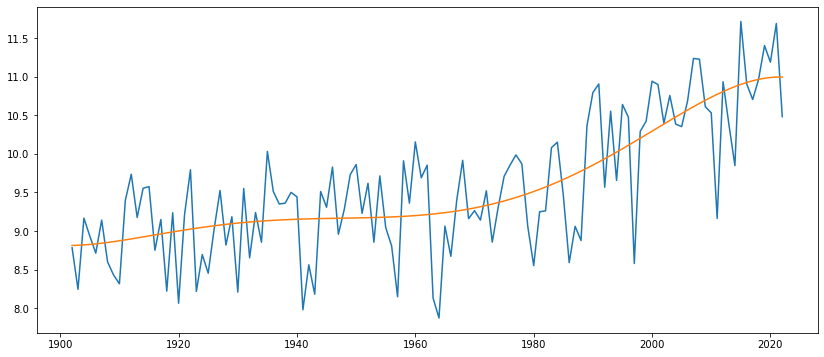

In [108]:
plt.figure(figsize=(14, 6))
plt.plot(yearly['GEMIDDELDE'])
plt.plot(yearly.index, model(yearly.index.year))
plt.show()